In [2]:
#scrape data From Wikipedia
import urllib.request
url = "https://en.wikipedia.org/wiki/List_of_best-selling_mobile_phones"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")


In [3]:
#SCrape HTML Data
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Manufacturer
 </th>
 <th>Model
 </th>
 <th>Form factor
 </th>
 <th>Smartphone?
 </th>
 <th>Year
 </th>
 <th colspan="2" data-sort-type="number">Graph (million units)
 </th></tr>
 <tr>
 <td><a href="/wiki/Nokia" title="Nokia">Nokia</a>
 </td>
 <td><a href="/wiki/Nokia_1100" title="Nokia 1100">1100</a>
 </td>
 <td><a href="/wiki/Form_factor_(mobile_phones)#Bar" title="Form factor (mobile phones)">Bar</a>
 </td>
 <td style="text-align:center">No
 </td>
 <td>2003
 </td>
 <td>250<sup class="reference" id="cite_ref-telegraph_20_3-0"><a href="#cite_note-telegraph_20-3">[2]</a></sup><sup class="reference" id="cite_ref-Top_10_Best_Selling_Nokia_Phones_1-1"><a href="#cite_note-Top_10_Best_Selling_Nokia_Phones-1">[1]</a></sup><sup class="reference" id="cite_ref-Nokia_hits:_The_best-selling_Nokia_phones_ever_4-0"><a href="#cite_note-Nokia_hits:_The_best-selling_Nokia_phones_ever-4">[3]</a></sup>
 </td>
 <td align="left"><span style="display:non

In [4]:
#<+++++++++++++++++Cleaning++++++++++++>
right_table=soup.find('table', class_='wikitable sortable')

In [5]:
right_table


<table class="wikitable sortable">
<tbody><tr>
<th>Manufacturer
</th>
<th>Model
</th>
<th>Form factor
</th>
<th>Smartphone?
</th>
<th>Year
</th>
<th colspan="2" data-sort-type="number">Graph (million units)
</th></tr>
<tr>
<td><a href="/wiki/Nokia" title="Nokia">Nokia</a>
</td>
<td><a href="/wiki/Nokia_1100" title="Nokia 1100">1100</a>
</td>
<td><a href="/wiki/Form_factor_(mobile_phones)#Bar" title="Form factor (mobile phones)">Bar</a>
</td>
<td style="text-align:center">No
</td>
<td>2003
</td>
<td>250<sup class="reference" id="cite_ref-telegraph_20_3-0"><a href="#cite_note-telegraph_20-3">[2]</a></sup><sup class="reference" id="cite_ref-Top_10_Best_Selling_Nokia_Phones_1-1"><a href="#cite_note-Top_10_Best_Selling_Nokia_Phones-1">[1]</a></sup><sup class="reference" id="cite_ref-Nokia_hits:_The_best-selling_Nokia_phones_ever_4-0"><a href="#cite_note-Nokia_hits:_The_best-selling_Nokia_phones_ever-4">[3]</a></sup>
</td>
<td align="left"><span style="display:none;">250</span><div style="wi

In [6]:
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==7:
        a.append(cells[0].find(text=True))
        b.append(cells[1].find(text=True))
        c.append(cells[2].find(text=True))
        d.append(cells[3].find(text=True))
        e.append(cells[4].find(text=True))
        f.append(cells[5].find(text=True))
        

In [7]:
a1=[]
b1=[]
c1=[]
d1=[]
e1=[]
f1=[]
g1=[]
for i in range(len(a)):
    a1.append(a[i].strip())
    b1.append(b[i].strip())
    c1.append(c[i].strip())
    d1.append(d[i].strip())
    e1.append(e[i].strip())
    f1.append(f[i].strip())
    

    

In [84]:
L1=list(set(a1))

In [86]:
L1[8]='RIM'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import plotly as go

In [11]:
#Create Data Frame
dicts={'Manufacturer':a1,"Model":b1,"Form Factor":c1,"Smatphone":d1,"Year":e1,'Mellion Unit sell':f1}
df=pd.DataFrame(dicts)

In [12]:
df

,Manufacturer,Model,Form Factor,Smatphone,Year,Mellion Unit sell
0,Nokia,1100,Bar,No,2003,250
1,Nokia,1110,Bar,No,2005,250
2,Apple,iPhone 6/6 Plus,Touchscreen,Yes,2014,222.4
3,Nokia,105 (2013),Bar,No,2013,200
4,Nokia,3210,Bar,No,1999,160
...,...,...,...,...,...,...
65,Research In Motion (RIM),BlackBerry Pearl,Bar,Yes,2006,15
66,Motorola,Droid Bionic,Touchscreen,Yes,2011,13
67,LG,Cookie (KP500),Touchscreen,No,2009,13
68,LG,G3,Touchscreen,Yes,2014,10


In [13]:
#save Data In Data.csv
df.to_csv('data.csv')

In [14]:
Tot_Sell=[]
for j in range(0,len(L1)):
    t=0
    for i in range(0,len(df)):
        if df['Manufacturer'][i]==L1[j]:
            t=t+float(df['Mellion Unit sell'][i])
    Tot_Sell.append(t)
    

In [15]:
Tot_Sell

[54.0, 0, 16.0, 53.0, 904.8, 20.0, 323.0, 45.0, 15.0, 2351.0]

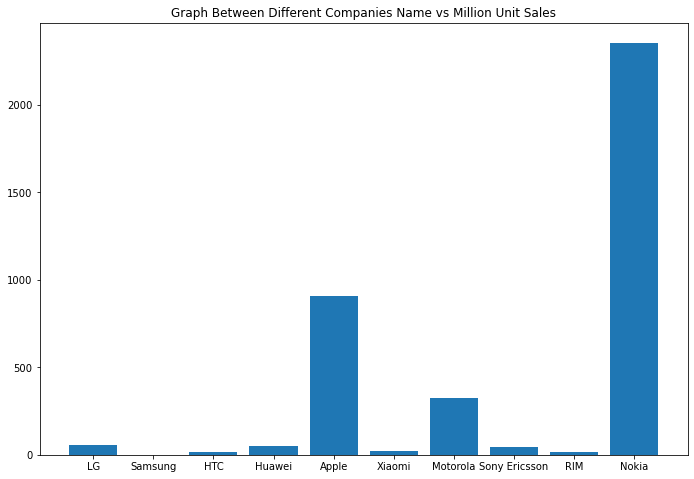

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
langs = L1
values = Tot_Sell
ax.bar(langs,values)
plt.title("Graph Between Different Companies Name vs Million Unit Sales")
plt.show()

In [17]:
Y=[]
U=[]
for i in range(len(df)):
    if df['Manufacturer'][i]=='Nokia':
        Y.append(df['Year'][i])
        U.append(df['Mellion Unit sell'][i])


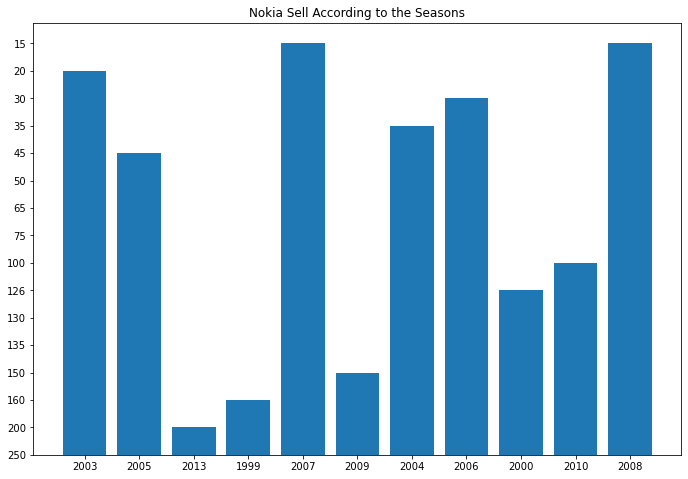

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
langs = Y
values = U
ax.bar(langs,values)
plt.title('Nokia Sell According to the Seasons')
plt.show()

In [19]:
#Twitter Sentoment analysis of Nokia Company.

In [20]:
# script to scrap tweets by a twitter user.
# dependencies - BeautifulSoup, requests
#username = Nokia

from bs4 import BeautifulSoup
import requests
import sys
import json



def get_tweet_text(tweet):
    tweet_text_box = tweet.find("p", {"class": "TweetTextSize TweetTextSize--normal js-tweet-text tweet-text"})
    images_in_tweet_tag = tweet_text_box.find_all("a", {"class": "twitter-timeline-link u-hidden"})
    tweet_text = tweet_text_box.text
    for image_in_tweet_tag in images_in_tweet_tag:
        tweet_text = tweet_text.replace(image_in_tweet_tag.text, '')

    return tweet_text

def get_this_page_tweets(soup):
    tweets_list = list()
    tweets = soup.find_all("li", {"data-item-type": "tweet"})
    for tweet in tweets:
        tweet_data = None
        try:
            tweet_data = get_tweet_text(tweet)
        except Exception as e:
            continue
            #ignore if there is any loading or tweet error

        if tweet_data:
            tweets_list.append(tweet_data)
            print(".", end="")
            sys.stdout.flush()

    return tweets_list


def get_tweets_data(username, soup):
    tweets_list = list()
    tweets_list.extend(get_this_page_tweets(soup))

    next_pointer = soup.find("div", {"class": "stream-container"})["data-min-position"]

    while True:
        next_url = "https://twitter.com/i/profiles/show/" + username + \
                   "/timeline/tweets?include_available_features=1&" \
                   "include_entities=1&max_position=" + next_pointer + "&reset_error_state=false"

        next_response = None
        try:
            next_response = requests.get(next_url)
        except Exception as e:
            # in case there is some issue with request. None encountered so far.
            print(e)
            return tweets_list

        tweets_data = next_response.text
        tweets_obj = json.loads(tweets_data)
        if not tweets_obj["has_more_items"] and not tweets_obj["min_position"]:
            # using two checks here bcz in one case has_more_items was false but there were more items
            print("\nNo more tweets returned")
            break
        next_pointer = tweets_obj["min_position"]
        html = tweets_obj["items_html"]
        soup = BeautifulSoup(html, 'lxml')
        tweets_list.extend(get_this_page_tweets(soup))

    return tweets_list


# dump final result in a json file
def dump_data(username, tweets):
    filename = username+"_twitter.json"
    print("\nDumping data in file " + filename)
    data = dict()
    data["tweets"] = tweets
    with open(filename, 'w') as fh:
        fh.write(json.dumps(data))

    return filename




def start(username = None):
    username = input('Enter User Name :')
    url = "http://www.twitter.com/" + username
    print("\n\nDownloading tweets for " + username)
    response = None
    try:
        response = requests.get(url)
    except Exception as e:
        print(repr(e))
        sys.exit(1)
    
    if response.status_code != 200:
        print("Non success status code returned "+str(response.status_code))
        sys.exit(1)

    soup = BeautifulSoup(response.text, 'lxml')

    if soup.find("div", {"class": "errorpage-topbar"}):
        print("\n\n Error: Invalid username.")
        sys.exit(1)

    tweets = get_tweets_data(username, soup)
    # dump data in a text file
    dump_data(username, tweets)
    print(str(len(tweets))+" tweets dumped.")


start()


Enter User Name :Nokia


..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
No more tweets returned

Dumping data in file Nokia_twitter.json
830 tweets dumped.


In [21]:
import pandas as pd
import json

In [22]:
#eading .json file created above
import pandas as pd
data = pd.read_json('Nokia_twitter.json')   #Load NokiaCompanies_twitter.json 
data

,tweets
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
825,.@TA_Group announces that @A1Telekom is stream...
826,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
827,We're hard at work and so proud to be working ...
828,We deliver the extraordinary: earlier today we...


In [23]:
df = data.iloc[:,[0]]

In [24]:
dframe=pd.DataFrame()
dframe['Nokia'] = df['tweets']
dframe

,Nokia
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
825,.@TA_Group announces that @A1Telekom is stream...
826,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
827,We're hard at work and so proud to be working ...
828,We deliver the extraordinary: earlier today we...


In [25]:
dframe['Nokia'][1]

'As we are strongly committed to delivering the most robust network infrastructures possible, we are proud to announce our collaboration with @Microsoft as part of the SONiC initiative. https://nokia.ly/35UjlKL\xa0'

In [26]:
#removing rows with '\n\n\n\n\n\n\n\n\n' as it is for emojis and  has no impact 
dff = dframe[~dframe.Nokia.str.contains('\n\n\n\n\n\n\n\n\n')]
dff

,Nokia
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
825,.@TA_Group announces that @A1Telekom is stream...
826,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
827,We're hard at work and so proud to be working ...
828,We deliver the extraordinary: earlier today we...


In [27]:
#resetting index 
dff.reset_index(inplace=True)
dff.columns

Index(['index', 'Nokia'], dtype='object')

In [28]:
#dropping old index column
dff = dff.drop(['index'], axis=1)
dff

,Nokia
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
825,.@TA_Group announces that @A1Telekom is stream...
826,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
827,We're hard at work and so proud to be working ...
828,We deliver the extraordinary: earlier today we...


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [30]:
#Downloading popular nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\SONIM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\SONIM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\SONIM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\SONIM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\SONIM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [31]:
#importing required libraries
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random

In [32]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
corpus=[]

In [33]:
#===data cleaning======
dff['Nokia'].isnull().sum(axis = 0)
dff.dropna(subset=['Nokia'],inplace=True)
dff.reset_index(inplace = True, drop = True) 
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nokia   830 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [34]:
#Working on words
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
import nltk
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}

    return tag_dict.get(tag, wn.NOUN)

In [35]:
total_words=[]
total_words1 = []
for i in range(len(dff['Nokia'])):
    print(i)
    text_for=dff['Nokia'][i]
    review = re.sub('[^a-zA-Z]',' ',str(text_for))
    review = review.lower()
    #review = review.split()
    all_word=[wordnet.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(review)]
    #print(all_word)
    #review=" ".join(all_word)
    review = [wordnet.lemmatize(word,'v') for word in all_word if not word in stopwords.words('english')]
    #print(review)
    total_words.append(review)
    review1 = ' '.join(review)
    corpus.append(review1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [36]:
print(len(corpus))
print(type(corpus))
print(len(total_words))

830
<class 'list'>
830


In [37]:
corpus

['ongoing pandemic highlight importance home wi fi connection next generation wi fi learn wi fi impact home connection http nokia ly wpzeh',
 'strongly commit deliver robust network infrastructure possible proud announce collaboration microsoft part sonic initiative http nokia ly ujlkl',
 'city wroclaw poland use smartcity platform deliver connect care old adult improve public transit city mobility strengthen emergency response http nokia ly fckcpc nokiainnovates',
 'today livestream deepfield team share insight macro effect covid pandemic cause network csps react change mark calendar join u learn http nokia ly fc v',
 'covid insight beyond three expert go live may share first hand insight late deepfield find relate lock save date join team next tuesday http nokia ly yvwow',
 'humble announce finland valuable brand fifth consecutive year accord brandfinance particularly unprecedented time world currently http nokia ly bdv rj',
 'proud work extenetsystems cal net bring one first deploym

In [38]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(dff['Nokia'].iloc[10]))
print(dff['Nokia'].iloc[10])

We partner with ABIresearch in a survey of more than 600 manufacturing decision-makers across nine major markets to assess investment strategies related to 4G/LTE 5G and Industry 4.0 Read more https nokia.ly/35zTszy
We partner with @ABIresearch in a survey of more than 600 #manufacturing decision-makers across nine major markets, to assess investment strategies related to 4G/LTE, #5G and Industry 4.0. Read more: https://nokia.ly/35zTszy 


In [40]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


print(no_user_alpha(form_sentence(dff['Nokia'].iloc[10])))
print(dff['Nokia'].iloc[10])

['partner', 'ABIresearch', 'survey', 'manufacturing', 'across', 'nine', 'major', 'markets', 'assess', 'investment', 'strategies', 'related', 'Industry', 'Read', 'https']
We partner with @ABIresearch in a survey of more than 600 #manufacturing decision-makers across nine major markets, to assess investment strategies related to 4G/LTE, #5G and Industry 4.0. Read more: https://nokia.ly/35zTszy 


In [41]:
#normalization 
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
x = []
y = []
for i in range(len(dff['Nokia'])):
    
    tweet_list = dff['Nokia'][i].split()
    t = normalization(tweet_list)
    print(t)
    x.append(t)    

['The', 'ongoing', 'pandemic', 'have', 'highlight', 'the', 'importance', 'of', 'your', 'in-home', 'Wi-Fi', 'connection.', 'But', 'what', 'be', 'the', 'next', 'generation', 'of', 'Wi-Fi', 'all', 'about?', 'Learn', 'how', 'Wi-Fi', '6', 'will', 'impact', 'your', 'home', 'connection:', 'https://nokia.ly/2WPzeh7']
['As', 'we', 'be', 'strongly', 'commit', 'to', 'deliver', 'the', 'most', 'robust', 'network', 'infrastructures', 'possible,', 'we', 'be', 'proud', 'to', 'announce', 'our', 'collaboration', 'with', '@Microsoft', 'as', 'part', 'of', 'the', 'SONiC', 'initiative.', 'https://nokia.ly/35UjlKL']
['The', 'city', 'of', 'Wroclaw,', 'Poland', 'be', 'use', 'our', '#smartcity', 'platform', 'to', 'deliver', 'connect', 'care', 'for', 'older', 'adults,', 'improve', 'public', 'transit', 'and', 'city', 'mobility,', 'and', 'strengthen', 'emergency', 'response.', 'https://nokia.ly/3fCKCpc', '#NokiaInnovates']
['In', "today's", '#livestream', 'our', '#Deepfield', 'team', 'will', 'share', 'insights', '

['We', 'be', 'expand', 'our', 'footprint', 'by', 'bring', 'Elenion’s', 'technology', 'expertise', 'and', 'unique', 'design', 'platform', 'and', 'service', 'on', 'board.', 'https://nokia.ly/2V5q0y0', '#5G', '#optical']
['ICYMI:', 'in', 'a', 'joint', '#5G', '#gamechanger', 'event', 'with', '@VodafoneGroup', 'our', 'Rajeev', 'Suri', 'discuss', 'how', '5G', 'enable', '#industry40', 'and', 'how', 'it', 'provide', 'an', 'immense', 'growth', 'potential', 'and', 'a', 'massive', 'opportunity', 'of', 'save', 'money,', 'increase', 'productivity,', 'get', 'greener', '&', 'make', 'digital', 'happen', 'at', 'scale.']
['Thank', 'you', '@PesicJelena_', 'for', 'share', 'why', 'you', 'find', 'it', 'amaze', 'to', 'work', 'at', '@nokia', '@BellLabs', '#TeamNokia', 'to', 'innovate', 'game', 'change', 'solutions.', '#nokiainnovates', '#WomenInScience', '#WomenInSTEM']
['ICYMI:', 'we', 'have', 'partner', 'with', '@airtelindia', 'to', 'offer', '#privateLTE', 'base', '#industry40', 'solution', 'to', 'enterpris

['5', 'cheer', 'for', '5G', 'momentum:', "we're", 'celebrate', '63', 'commercial', '#5G', 'deals!', 'Read', 'more:', 'https://nokia.ly/37Psdkp', '#innovation']
['What', 'do', 'you', 'look', 'for', 'in', 'a', '#5G', 'partner?', 'More', 'and', 'more', 'operators', 'in', 'lead', 'early', 'adopter', 'market', 'be', 'look', 'to', 'us', 'to', 'drive', 'business', 'success.', 'Learn', 'why', 'in', 'this', 'blog', 'from', '@phil_twist:', 'https://nokia.ly/36zZHmM']
['Our', 'very', 'own', '@jre_elliott', 'will', 'join', '@robpegoraro', 'of', '@YahooFinance', 'and', 'Arvin', 'Singh', 'of', '@verizon', 'in', 'a', '#5G', 'meet', '#HighTechRetail', 'panel', 'today.', 'https://nokia.ly/36zkmav', 'Not', 'at', '#CES2020?', 'Read', "Jason's", 'blog', '"Retailers', 'and', 'shoppers', 'rejoice"', 'https://nokia.ly/2QzAFi7', '@HighTechRetail']
["We're", 'delight', 'to', 'continue', 'to', 'contribute', 'to', 'a', 'group', 'of', 'cross-sector', 'Nordic', 'company', 'collaborate', 'for', 'a', 'sustainable', 

['We', 'join', 'the', 'Broadband', 'Commission', '@UNBBCom', 'and', '@WorldBank', 'call', 'for', 'all', 'stakeholders', 'to', 'come', 'together', 'and', 'collaborate', 'to', 'realize', 'universally', 'affordable', 'access', 'to', 'the', 'internet', 'for', 'all', 'Africans.', 'https://nokia.ly/2PhMvgw', '#ConnectAfrica', '@_AfricanUnion', '#AfricaCom', '#connectivity', '#SDGs']
['We', 'be', 'honor', 'to', 'accept', 'the', '#5G', 'Prize', 'from', 'the', 'Danish', 'Energy', 'Agency', '&', '@IDAdk!', 'This', 'award', 'be', 'recognition', 'of', 'our', 'unique', 'research', 'collaboration', '&', 'partnership', 'w/', '@aautech', '(DAPP)', 'drive', 'cellular', 'standards', 'innovation.', 'https://nokia.ly/2BFpNH5']
["That's", 'a', 'wrap', '#MWC19!', 'Big', 'thank', 'to', '#TeamNokia', 'for', 'the', 'amaze', 'show.', 'See', 'you', 'next', 'year', 'at', '#MWC20.', 'https://nokia.ly/365XT4Q']
['We', 'have', 'the', 'honor', 'of', 'host', 'Dr.', 'Lisa', 'Porter,', 'the', 'Deputy', 'Undersecretary',

['Rajeev', 'Suri', 'blog', 'how', 'we', 'be', 'commit', 'to', 'a', 'cleaner,', 'more', 'connect', 'world.', 'There', 'isn’t', 'much', 'time.', 'The', '#climate', 'crisis', 'be', 'real.', 'But', 'so', 'be', 'the', 'weapons', 'to', 'fight', 'it.', 'Let’s', 'start', 'digitalize', 'our', 'way', 'to', 'a', 'better,', 'cleaner,', 'safer', 'planet.', '#OurOnlyFuture', '#5G', 'https://nokia.ly/2MdotQq']
['Nokia', '#5G:', 'green', 'and', 'cool!', 'Meet', '@piatanska', 'and', '@harkuo', 'discuss', 'our', 'commitment', 'to', 'reduce', 'power', 'consumption', 'and', 'waste', 'to', 'fight', 'against', '#climate', 'change', 'and', 'enable', 'a', '#ZeroEmissions', 'digital', 'future', 'for', 'society.', '#SDGs', '#ClimateAction', '#OurOnlyFuture']
['Alex', 'Thomson', 'Racing', '&', '@Nokia', 'Bell', 'Labs', 'have', 'team', 'up', 'to', 'push', 'the', 'boundaries', 'of', 'what', 'man', 'and', 'machine', 'can', 'accomplish', 'in', 'extreme,', 'mission-critical', 'environments', '&', 'to', 'win', 'the', 

In [42]:
x

[['The',
  'ongoing',
  'pandemic',
  'have',
  'highlight',
  'the',
  'importance',
  'of',
  'your',
  'in-home',
  'Wi-Fi',
  'connection.',
  'But',
  'what',
  'be',
  'the',
  'next',
  'generation',
  'of',
  'Wi-Fi',
  'all',
  'about?',
  'Learn',
  'how',
  'Wi-Fi',
  '6',
  'will',
  'impact',
  'your',
  'home',
  'connection:',
  'https://nokia.ly/2WPzeh7'],
 ['As',
  'we',
  'be',
  'strongly',
  'commit',
  'to',
  'deliver',
  'the',
  'most',
  'robust',
  'network',
  'infrastructures',
  'possible,',
  'we',
  'be',
  'proud',
  'to',
  'announce',
  'our',
  'collaboration',
  'with',
  '@Microsoft',
  'as',
  'part',
  'of',
  'the',
  'SONiC',
  'initiative.',
  'https://nokia.ly/35UjlKL'],
 ['The',
  'city',
  'of',
  'Wroclaw,',
  'Poland',
  'be',
  'use',
  'our',
  '#smartcity',
  'platform',
  'to',
  'deliver',
  'connect',
  'care',
  'for',
  'older',
  'adults,',
  'improve',
  'public',
  'transit',
  'and',
  'city',
  'mobility,',
  'and',
  'strengt

In [43]:
dff

,Nokia
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
825,.@TA_Group announces that @A1Telekom is stream...
826,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
827,We're hard at work and so proud to be working ...
828,We deliver the extraordinary: earlier today we...


In [44]:
#dropping duplicates
dff=dff.drop_duplicates()

In [45]:
#checking null values
print(dff.isna().sum())

Nokia    0
dtype: int64


In [46]:
#Vectorizing words
from gensim.models import Word2Vec
from sklearn import metrics
model = Word2Vec(total_words,min_count=1,size=32)

X=model[model.wv.vocab]

<ipython-input-46-717eb57cedbd>:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [47]:
#######----------------------------------------- Positive List ----------------------------------------------------#########
positive = ['good', 'average','gd','avg','nice','wow','more','well','best','tasty','accepted','acclaimed','admire','achievement','adorable',
           'agree','agreeable','amazing','approve','approveed','attractive','awesome','beautiful','believe','beneficial','bountiful','brilliant','bravo',
           'celebrated','champion','charming','choice','cheers','clean','congratulation','cool','dazzling','delight','delightful','divine','easy','effective',
           'elegant','encouraging','endorsed','excellent','exciting','fabulous','fair','familiar','famous','fantastic','favorable','fine','free','fresh',
            'friendly','fun','funny','genius','genuine','glamorous','gorgeous','great','handsome','happy','healthy','heartly','honorable','honest','hug',
            'ideal','impressive','innovative','instant','intellectual','intelligent','intuitive','joy','lovely','lucky','merit','natural','one-hundred percent',
           'perfect','phenomenal','pleasant','pleasurable','positive','protected','proud','quality','refined','rejoice','reward','respected','safe','satisfactory',
            'special','smile','successful','superb','super','tops','top','trusting','truthful','true','unreal','up','valued','welcome','worthy','willing','yummy','yes']

In [48]:
import nltk 
from nltk.corpus import wordnet 
pos_synonyms = [] 
for i in positive:
    for syn in wordnet.synsets(i): 
        for l in syn.lemmas(): 
            pos_synonyms.append(l.name()) 
pos_list=list(set(pos_synonyms))           
print(set(pos_synonyms))

{'perfective_tense', 'check', 'boost', 'shake_up', 'notable', 'natural', 'promote', 'funny_remark', 'pay_back', 'twinkling', 'saint', 'clean_house', 'disembarrass', 'thigh-slapper', 'soman', 'pose', 'hotshot', 'protagonist', 'arouse', 'amusing', 'admire', 'artificial', 'endorse', 'amaze', 'salutary', 'crown', 'to_a_greater_extent', 'superintendent', 'GD', 'vivid', 'supporter', 'goodish', 'secure', 'bighearted', 'easy', 'awful', 'electropositive', 'hug', 'large', 'practiced', 'urge', 'uninfected', 'clap', 'elysian', 'pure', 'cheer_up', 'familiar_spirit', 'born', 'promiscuous', 'all_right', 'intrust', 'barren', 'gravid', 'encourage', 'satisfactory', 'white', 'teetotum', 'desire', 'nerveless', 'summit', 'finely', 'champ', 'wink', 'nonpareil', 'polish', 'admit', 'famous', 'joyfulness', 'precious', 'wild', 'happy', 'fascinate', 'full', 'timbre', 'intelligent', 'devoid', 'squeeze', 'efficacious', 'overnice', 'prime', 'magnificent', 'cool_off', 'cool', 'observe', 'sorcerous', 'felicitous', 'd

In [49]:
pos_w2v_list=[]
for i in pos_list:
    try:
        hk=model.most_similar(positive=[i], negative=[],topn=2)
        print(hk)
        for j in range(len(hk)):
            pos_w2v_list.append(hk[j][0])
    except:
        pass
    
print(pos_w2v_list)
print(len(pos_w2v_list))

[('rajeev', 0.9958813190460205), ('build', 0.9952535629272461)]
[('kick', 0.966594398021698), ('sea', 0.9636163711547852)]
[('r', 0.9774019122123718), ('know', 0.9739039540290833)]
[('break', 0.8922112584114075), ('livestream', 0.8872732520103455)]
[('academia', 0.8340845108032227), ('transport', 0.8146178722381592)]
[('area', 0.9945428967475891), ('best', 0.9940654635429382)]
[('henkkahypponen', 0.7921845316886902), ('saleem', 0.769450306892395)]
[('wef', 0.9949509501457214), ('high', 0.9939258694648743)]
[('year', 0.9963433146476746), ('enterprise', 0.9961504936218262)]
[('proximity', 0.8650231957435608), ('unicef', 0.8638602495193481)]
[('recognition', 0.9021516442298889), ('markus', 0.9018812775611877)]
[('reuse', 0.7714096903800964), ('con', 0.7712876796722412)]
[('inspire', 0.9640268683433533), ('commit', 0.9625598788261414)]
[('foundation', 0.9438130259513855), ('community', 0.9414894580841064)]
[('winnovate', 0.5642755627632141), ('siec', 0.5537762641906738)]
[('customer', 0.99

<ipython-input-49-0bee2e698a59>:4: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[('plan', 0.9880228638648987), ('like', 0.9877110719680786)]
[('consumer', 0.9810039401054382), ('standard', 0.9750440716743469)]
[('youtube', 0.9388164281845093), ('reilly', 0.9388115406036377)]
[('icymi', 0.9723271727561951), ('commit', 0.9683812856674194)]
[('today', 0.9978317022323608), ('nokia', 0.9976713061332703)]
[('balazs', 0.7407588362693787), ('niklas', 0.736017107963562)]
[('virtually', 0.6706508994102478), ('vcmx', 0.6532715559005737)]
[('take', 0.9919191002845764), ('get', 0.9917774796485901)]
[('come', 0.9877275228500366), ('next', 0.987707793712616)]
[('decade', 0.9306367039680481), ('summary', 0.9287074208259583)]
[('speed', 0.9690943360328674), ('wireless', 0.9684897065162659)]
[('together', 0.9913240671157837), ('open', 0.9907791018486023)]
[('span', 0.946406900882721), ('highly', 0.9433975219726562)]
[('portfolio', 0.9557158946990967), ('automation', 0.9546980261802673)]
[('play', 0.9829135537147522), ('vendor', 0.9828033447265625)]
[('session', 0.9040319323539734),

In [50]:
#================================================negative list======================================================
negative = ['adverse','alarming','angry','apathy','awful','bad','banal','barbed','belligerent','bemoan','beneath','boring','broken',
           'cruel','cry','cant','clumsy','deny','depressed','dirty','disease','disgusting','dont','evil','fail','faulty','filthy','ghastly','grave',
           'guilty','hard','hardhearted','harmful','hate','hurt','horrible','icky','ignorant','ignore','ill','immature','imperfect',
           'injure','injurious','junky','lose','lost','loss','missing','naive','nasty','negate','negative','never','no','nobody',
           'old','pain','poor','petty','quirky','quit','reject','rejected','rude','ruthless','sad','scare','scary','scream','sick','sickening','sinister',
           'sorry','sticky','stupid','suspect','suspicious','terrible','terrifying','threatening','ugly','unfair','unfavorable','unhappy',
            'unhealthy','unjust','unlucky','unpleasant','unsatisfactory','unwanted','upset','vicious','vindictive','wary','weary','wicked',
            'woeful','worthless','zero']

print(len(negative))
print(len(positive))

100
116


In [51]:
#==============================================find all positive synonyms ========================================== 
import nltk 
from nltk.corpus import wordnet 
neg_synonyms = [] 

for i in negative:
    for syn in wordnet.synsets(i): 
        for l in syn.lemmas(): 
            neg_synonyms.append(l.name()) 
neg_list=list(set(neg_synonyms))
print(neg_list)
print(len(set(neg_synonyms)))

['hard', 'throw_in', 'check', 'painful_sensation', 'humbled', 'spiteful', 'let_out', 'ill-starred', 'dingy', 'natural', 'spite', 'brutal', 'detest', 'knock_over', 'hollo', 'stonyhearted', 'doomed', 'stupe', 'numbness', 'frightfully', 'unpleasant', 'ominous', 'thigh-slapper', 'poor_people', 'strong', 'lack', 'screeching', 'peril', 'cruddy', 'cant', 'swage', 'unkept', 'commonplace', 'break_up', 'come_down', 'drop_out', 'freeze_off', 'ill-bred', 'awful', 'bump', 'bungling', 'electronegative', 'freak', 'endanger', 'miscarry', 'wear_out', 'barbed', 'junky', 'threadbare', 'frighten_away', 'loathsome', 'unhealthy', 'arduous', 'zilch', 'ailment', 'incorrect', 'macabre', 'chuck_up_the_sponge', 'scarey', 'hurt', 'former', 'terrorize', 'colly', 'at_a_lower_place', 'deprivation', 'disoriented', 'pathetic', 'nescient', 'wild', 'departure', 'aggressive', 'derangement', 'muddied', 'rule_out', 'tump_over', 'tempestuous', 'take_leave', 'missing', 'adverse', 'menacing', 'pain_in_the_neck', 'nipping', 'c

In [52]:
#==========================================find top2 words most similar negatives===========================================
neg_w2v_list=[]
for i in neg_list:
    try:
        mk=model.most_similar(positive=[i], negative=[],topn=2)
        print(mk)
        for j in range(len(mk)):
            neg_w2v_list.append(mk[j][0])
    except:
        pass
    
print(neg_w2v_list)
print(len(neg_w2v_list))

[('inform', 0.7201915979385376), ('paulo', 0.7174624800682068)]
[('rajeev', 0.9958813190460205), ('build', 0.9952535629272461)]
[('operational', 0.989708662033081), ('belllabs', 0.9870392680168152)]
[('others', 0.7885149121284485), ('environmentally', 0.7821597456932068)]
[('chi', 0.8150303363800049), ('mmg', 0.8020787835121155)]
[('know', 0.9453291893005371), ('ho', 0.9443352818489075)]
[('work', 0.9983545541763306), ('business', 0.9982587695121765)]
[('deal', 0.9584595561027527), ('era', 0.9558339715003967)]
[('help', 0.9985669851303101), ('share', 0.9985175132751465)]
[('zzcrrn', 0.6601107716560364), ('vpg', 0.6578261852264404)]
[('node', 0.8575872182846069), ('party', 0.8513844013214111)]
[('motivation', 0.7557545900344849), ('creative', 0.7221934199333191)]
[('bill', 0.9156376719474792), ('brian', 0.9087942838668823)]
[('world', 0.9977748990058899), ('next', 0.9975917339324951)]
[('ip', 0.79726243019104), ('seminar', 0.7964848279953003)]
[('skola', 0.745637834072113), ('colleague'

<ipython-input-52-7a6a3f101e9a>:5: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



In [53]:
#============================================extend both list===========================================================
pos_w2v_list.extend(positive)
neg_w2v_list.extend(negative)
pos_w2v_list=set(pos_w2v_list)
neg_w2v_list=set(neg_w2v_list)

pos_w2v_list=list(pos_w2v_list)
neg_w2v_list=list(neg_w2v_list)

pos_w2v_list=list(pos_w2v_list[::-1])
neg_w2v_list=list(neg_w2v_list[::-1])
print(len(pos_w2v_list))

print(len(pos_w2v_list))
print(len(neg_w2v_list))

390
390
181


In [54]:
#==========================================check freq of words in both clusters========================================
pos_word =list(set(pos_w2v_list.copy()))
print(len(pos_word))
neg_word = list(set(neg_w2v_list.copy()))
pos_word.extend(neg_word)
print(len(pos_word))
count_df={}
for i in pos_word:
    if i in count_df:
        count_df[i] +=1
    else:
        count_df[i] =1

390
571


In [55]:
#===========================================shuffle elements of positive and negative list===============================
random.shuffle(pos_w2v_list) 
random.shuffle(neg_w2v_list)

In [56]:
#================================================predict labels===================================================
pos_flag=1
neg_flag=1
label=[]
def pre(text):
    check_str=[]
    global pos_flag
    global neg_flag
    wordnet=WordNetLemmatizer()
    check = re.sub('[^a-zA-Z]',' ',str(text))
    check = check.lower()
    check_all_word=[wordnet.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(check)]
    check_word = [wordnet.lemmatize(word) for word in check_all_word if not word in stopwords.words('english')]
    check_str.append(check_word)
    output = list(ngrams(check_word, 2))
    for i in range(len(output)):
        new_word=output[i][0]+"-"+output[i][1]
        check_str[0].append(new_word)

    for i in range(len(check_str)):
        pos_flag=0
        neg_flag=0
        for j in range(len(check_str[i])-1,-1,-1):
            if check_str[i][j] in pos_w2v_list:
                label.append("Positive")
                #global pos_flag
                pos_flag=2
                #print("Positive",check_str[i][j])
                break
            elif check_str[i][j] in neg_w2v_list:
                label.append("Negative")
                #global neg_flag
                neg_flag=2
                #print("Negative",check_str[i][j])
                break
        else:
            label.append("Neutral")
            pass
            
    if pos_flag==2 and neg_flag==2:
        return 'Both'
    elif pos_flag ==2:
        return "Positive"
    elif neg_flag ==2:
        return "Negative"
    else:
        return "Neutral"

In [57]:
#Filtereing datasets by removing rows with no means

In [58]:
#resetting index
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)
dff

,Nokia
0,The ongoing pandemic has highlighted the impor...
1,As we are strongly committed to delivering the...
2,"The city of Wroclaw, Poland is using our #smar..."
3,In today's #livestream our #Deepfield team wil...
4,#COVID19 insights - and beyond. Three of our e...
...,...
790,.@TA_Group announces that @A1Telekom is stream...
791,Kriengsak Wanichnatee CTO @AIS_Thailand and ou...
792,We're hard at work and so proud to be working ...
793,We deliver the extraordinary: earlier today we...


In [59]:
#Data filtering is done by removing some useless rows

In [60]:
#finding positive/negative/neutral tweets
for i in range(len(dff['Nokia'])):
    print(i)
    text_for=dff['Nokia'][i]
#   print(text_for)
    pre(text_for)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [61]:
#=======================creating label data for Nokia Group=================================================
Nokia_label = []
for i in range(len(dff['Nokia'])):
    print(i)
    text_for=dff['Nokia'][i]
#    print(text_for)
    x = pre(text_for)
    Nokia_label.append(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
#Label data of Nokia Group Tweets
Nokia_label

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',


In [63]:
#creating dataframe for Nokia with tweets and their definition (positive/negative/neutral)
pre_text2 = pd.DataFrame(Nokia_label,columns=['Nokia_label'])
my_df2 = pd.DataFrame(Nokia_label)
my_df2[0].value_counts()


new_pre_df3 = pd.DataFrame({'Nokia':dff['Nokia'][:],'label':pre_text2['Nokia_label'][:]})
print(new_pre_df3)

                                                 Nokia     label
0    The ongoing pandemic has highlighted the impor...  Positive
1    As we are strongly committed to delivering the...  Positive
2    The city of Wroclaw, Poland is using our #smar...  Positive
3    In today's #livestream our #Deepfield team wil...  Positive
4    #COVID19 insights - and beyond. Three of our e...  Positive
..                                                 ...       ...
790  .@TA_Group announces that @A1Telekom is stream...  Positive
791  Kriengsak Wanichnatee CTO @AIS_Thailand and ou...  Positive
792  We're hard at work and so proud to be working ...  Positive
793  We deliver the extraordinary: earlier today we...  Positive
794  Live from New York with @sprint: our Ricky Cor...  Positive

[795 rows x 2 columns]


In [64]:
#Creating final dataframe

In [65]:
dfFinal = pd.DataFrame()

In [66]:
dfFinal['Nokia'] = new_pre_df3['Nokia']
dfFinal['Nokia_label'] = new_pre_df3['label']

In [67]:
dfFinal.head()

,Nokia,Nokia_label
0,The ongoing pandemic has highlighted the impor...,Positive
1,As we are strongly committed to delivering the...,Positive
2,"The city of Wroclaw, Poland is using our #smar...",Positive
3,In today's #livestream our #Deepfield team wil...,Positive
4,#COVID19 insights - and beyond. Three of our e...,Positive


In [68]:
dfFinal.to_csv('finals.csv',index=False)

In [69]:
#checking no of positive, negative and neutral labels of Nokia Groups
dfFinal['Nokia_label'].value_counts()

Positive    735
Negative     57
Neutral       3
Name: Nokia_label, dtype: int64

In [94]:
#Applying LabelEncoding on label columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfFinal['Nokia_label'] = le.fit_transform(dfFinal.Nokia_label.values)
dfFinal.head()
dfFinal[].to_csv('tab.csv')

In [96]:
dfFinal['Nokia_label'].value_counts()
dfFinal['Nokia_label'].to_csv('tab1.csv')

In [72]:
# here 2 means positive
# 1 means negative 
# and 0 means neutral

In [73]:
import matplotlib.pyplot as plt

In [74]:
#For Nokia

Text(0, 0.5, 'Frequency')

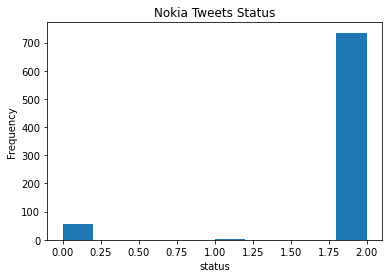

In [75]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dfFinal['Nokia_label'])
# set title and labels
ax.set_title('Nokia Tweets Status')
ax.set_xlabel('status')
ax.set_ylabel('Frequency')

AxesSubplot(0.125,0.125;0.775x0.755)


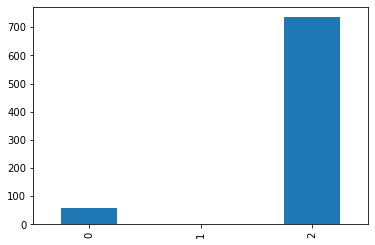

In [76]:
#For Nokia Group
print(dfFinal['Nokia_label'].value_counts().sort_index().plot.bar())
